# Trading com Python PETR4 RSI


https://www.youtube.com/watch?v=31hldK-7f4A

O Índice de Força Relativa (RSI - Relative Strength Index) é um indicador técnico de momentum usado na análise de ações e outros ativos financeiros. Desenvolvido por J. Welles Wilder em 1978, o RSI mede a velocidade e a mudança dos movimentos de preço e varia entre 0 e 100. O indicador é comumente usado para identificar condições de sobrecompra e sobrevenda no mercado, bem como possíveis reversões de tendência.

O RSI é calculado com base na relação entre os ganhos médios e as perdas médias em um período específico de tempo, geralmente 14 dias. A fórmula do RSI é:

css
Copy code
RSI = 100 - [100 / (1 + RS)]
Onde RS é a relação entre a média dos ganhos e a média das perdas no período.

A interpretação convencional do RSI é a seguinte:

Valores acima de 70 indicam que o ativo está sobrecomprado, ou seja, pode haver uma reversão para baixo em breve.
Valores abaixo de 30 indicam que o ativo está sobrevendido, ou seja, pode haver uma reversão para cima em breve.
Os traders usam o RSI como parte de suas estratégias de negociação para identificar pontos de entrada e saída ideais. Ao aplicar o RSI em uma estratégia de ações, os traders geralmente compram quando o RSI está abaixo do limite inferior (por exemplo, 30) e vendem quando o RSI está acima do limite superior (por exemplo, 70). Esses limiares podem ser ajustados com base na tolerância ao risco e nas características do ativo em questão.

Vale lembrar que, embora o RSI seja uma ferramenta popular e útil na análise técnica, nenhum indicador é perfeito ou garante sucesso nas negociações. É importante combinar o RSI com outros indicadores e análises fundamentais para tomar decisões de investimento mais bem informadas.

In [1]:
#importando bibliotecas
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

from datetime import datetime, timedelta


pd.options.mode.chained_assignment = None
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Obter a data de hoje
end_date = datetime.today()

# Obter a data de 3 anos atrás
tempo = 24 

start_date = end_date - timedelta(days=tempo*365)

# Definir as datas para o primeiro dia do ano
end_date = end_date

start_date = start_date.replace(month=1, day=1)

# Imprimir as datas
print("Hoje:", end_date.date())
print(f"Primeiro dia {tempo} anos atrás:", start_date.date())

Hoje: 2023-05-10
Primeiro dia 24 anos atrás: 1999-01-01


In [3]:
#escolha do ativo padrão
ativo = 'PETR4.SA'

In [4]:
#Download de dados

dados_ativo = yf.download(ativo, start_date)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

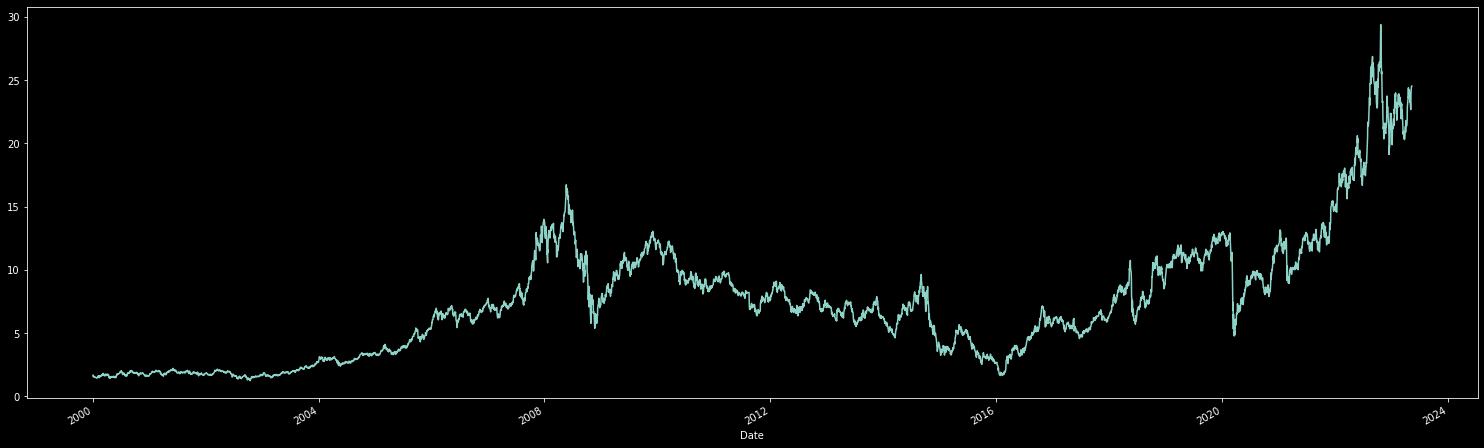

In [5]:
dados_ativo['Adj Close'].plot(figsize=(26, 8))

In [6]:
dados_ativo

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.666925,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.574712,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.558823,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.553432,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.560526,20912640000
...,...,...,...,...,...,...
2023-05-03,22.600000,22.990000,22.420000,22.660000,22.660000,51133700
2023-05-04,22.889999,23.379999,22.610001,23.020000,23.020000,57854400
2023-05-05,23.299999,24.170000,23.180000,24.000000,24.000000,83365200


## Calcular os retornos

In [7]:
dados_ativo['Retornos'] = dados_ativo['Adj Close'].pct_change().dropna()

In [8]:
dados_ativo

,Open,High,Low,Close,Adj Close,Volume,Retornos
Date,,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.666925,35389440000,NaN
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.574712,28861440000,-0.055319
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.558823,43033600000,-0.010091
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.553432,34055680000,-0.003458
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.560526,20912640000,0.004566
...,...,...,...,...,...,...,...
2023-05-03,22.600000,22.990000,22.420000,22.660000,22.660000,51133700,-0.003518
2023-05-04,22.889999,23.379999,22.610001,23.020000,23.020000,57854400,0.015887
2023-05-05,23.299999,24.170000,23.180000,24.000000,24.000000,83365200,0.042572


## Passo 4  Separar os retornos positivos dos negativos

In [9]:
#dados_ativo['Pos_rturn'] = dados_ativo['Retornos'].apply(lambda x: x if x > 0 else NaN)
dados_ativo['Pos_rturn'] = dados_ativo['Retornos'].apply(lambda x: x if x > 0 else 0)
dados_ativo['Neg_rturn'] = dados_ativo['Retornos'].apply(lambda x: abs(x) if x < 0 else 0)


In [10]:
dados_ativo

,Open,High,Low,Close,Adj Close,Volume,Retornos,Pos_rturn,Neg_rturn
Date,,,,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.666925,35389440000,NaN,0.000000,0.000000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.574712,28861440000,-0.055319,0.000000,0.055319
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.558823,43033600000,-0.010091,0.000000,0.010091
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.553432,34055680000,-0.003458,0.000000,0.003458
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.560526,20912640000,0.004566,0.004566,0.000000
...,...,...,...,...,...,...,...,...,...
2023-05-03,22.600000,22.990000,22.420000,22.660000,22.660000,51133700,-0.003518,0.000000,0.003518
2023-05-04,22.889999,23.379999,22.610001,23.020000,23.020000,57854400,0.015887,0.015887,0.000000
2023-05-05,23.299999,24.170000,23.180000,24.000000,24.000000,83365200,0.042572,0.042572,0.000000


## Passo 5 Calcular a média

In [11]:
dados_ativo['pos_rturn_mean'] = dados_ativo['Pos_rturn'].rolling(window=22).mean()
dados_ativo['neg_rturn_mean'] = dados_ativo['Neg_rturn'].rolling(window=22).mean()

dados_ativo = dados_ativo.dropna(axis=0)

## Calcular o RSI

In [12]:
# Calcular o RSI => 100 - 100/(1 + mediaPosrturn / mediaNegRturn)

dados_ativo['RSI'] = (100 - 100/ 
                      (1 + dados_ativo['pos_rturn_mean']/dados_ativo['neg_rturn_mean']))

In [13]:
dados_ativo

,Open,High,Low,Close,Adj Close,Volume,Retornos,Pos_rturn,Neg_rturn,pos_rturn_mean,neg_rturn_mean,RSI
Date,,,,,,,,,,,,
2000-02-01,5.200000,5.200000,5.200000,5.200000,1.475406,23672320000,0.019408,0.019408,0.000000,0.003489,0.008878,28.210913
2000-02-02,5.300000,5.300000,5.300000,5.300000,1.503779,14272000000,0.019231,0.019231,0.000000,0.004363,0.008878,32.950000
2000-02-03,5.450000,5.450000,5.450000,5.450000,1.546339,25950720000,0.028302,0.028302,0.000000,0.005650,0.006364,47.026766
2000-02-04,5.588000,5.588000,5.588000,5.588000,1.585494,21199360000,0.025321,0.025321,0.000000,0.006800,0.005905,53.523025
2000-02-07,5.625000,5.625000,5.625000,5.625000,1.595992,20613120000,0.006621,0.006621,0.000000,0.007101,0.005748,55.266324
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-03,22.600000,22.990000,22.420000,22.660000,22.660000,51133700,-0.003518,0.000000,0.003518,0.010464,0.007368,58.680496
2023-05-04,22.889999,23.379999,22.610001,23.020000,23.020000,57854400,0.015887,0.015887,0.000000,0.011053,0.007368,60.001676
2023-05-05,23.299999,24.170000,23.180000,24.000000,24.000000,83365200,0.042572,0.042572,0.000000,0.012988,0.006382,67.052095


## Passo 7 Sinais de Compras

In [14]:
dados_ativo.loc[dados_ativo['RSI'] < 30, 'compra' ] = 'sim'
dados_ativo.loc[dados_ativo['RSI'] > 30, 'compra' ] = 'Não'

In [15]:
datas_compras = []
datas_vendas = []

for i in range(len(dados_ativo)):
    #print(i)
    
    
    if 'sim' in dados_ativo['compra'].iloc[i]:
        
        datas_compras.append(dados_ativo.iloc[i + 1].name) # comprar no preço de abertura do dia seguinte
        for j in range(1, 11):
            if dados_ativo['RSI'].iloc[ i + j] > 40:
                datas_vendas.append(dados_ativo.iloc[ i + j + 1].name)
                break
            elif j == 10:
                datas_vendas.append(dados_ativo.iloc[ i + j + 1].name)
                
            
        
datas_compras

[Timestamp('2000-02-02 00:00:00'),
 Timestamp('2000-08-04 00:00:00'),
 Timestamp('2000-12-07 00:00:00'),
 Timestamp('2000-12-08 00:00:00'),
 Timestamp('2000-12-22 00:00:00'),
 Timestamp('2000-12-25 00:00:00'),
 Timestamp('2001-03-19 00:00:00'),
 Timestamp('2001-03-20 00:00:00'),
 Timestamp('2001-03-21 00:00:00'),
 Timestamp('2001-03-23 00:00:00'),
 Timestamp('2001-03-27 00:00:00'),
 Timestamp('2001-04-03 00:00:00'),
 Timestamp('2001-04-04 00:00:00'),
 Timestamp('2001-04-05 00:00:00'),
 Timestamp('2001-07-05 00:00:00'),
 Timestamp('2001-07-06 00:00:00'),
 Timestamp('2001-07-09 00:00:00'),
 Timestamp('2002-06-20 00:00:00'),
 Timestamp('2002-06-21 00:00:00'),
 Timestamp('2002-06-24 00:00:00'),
 Timestamp('2002-06-25 00:00:00'),
 Timestamp('2002-06-26 00:00:00'),
 Timestamp('2002-07-29 00:00:00'),
 Timestamp('2002-07-30 00:00:00'),
 Timestamp('2002-07-31 00:00:00'),
 Timestamp('2002-10-14 00:00:00'),
 Timestamp('2002-10-15 00:00:00'),
 Timestamp('2002-10-16 00:00:00'),
 Timestamp('2002-10-

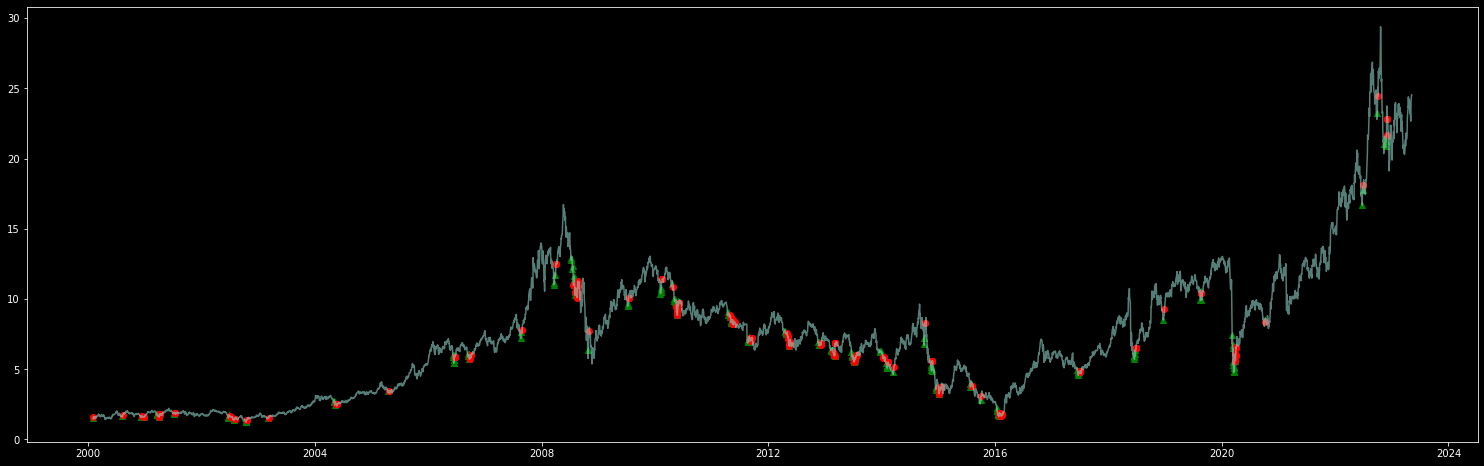

In [16]:
plt.figure(figsize=(26,8))
plt.scatter(dados_ativo.loc[datas_compras].index, dados_ativo.loc[datas_compras]['Adj Close'], marker = '^', c = 'green')
plt.scatter(dados_ativo.loc[datas_vendas].index, dados_ativo.loc[datas_vendas]['Adj Close'], marker='o', c='red')
plt.plot(dados_ativo['Adj Close'], alpha = .6)

In [17]:
# calculando os lucros

lucros = dados_ativo.loc[datas_vendas]['Open'].values / dados_ativo.loc[datas_compras]['Open'].values - 1

lucros

array([ 5.43395509e-02,  7.31183124e-02,  5.10998253e-02,  3.52297721e-02,
        2.41610290e-02,  1.73333062e-02, -1.30560927e-01, -1.23781649e-01,
       -6.84104924e-02,  4.76386364e-02,  5.88598601e-02,  1.44605114e-01,
        1.11231136e-01,  5.00000156e-02,  3.25670639e-02,  3.65384909e-02,
        3.25670639e-02, -3.30595603e-02,  1.08225106e-02,  7.12962491e-02,
        2.52796655e-02, -1.04925411e-02,  7.35181707e-02,  6.83544497e-02,
        4.22326257e-02,  9.19219804e-02,  8.43706531e-02,  1.13636361e-01,
        5.86011897e-02,  3.25570074e-02, -5.80002382e-02, -4.60526316e-02,
        1.44769674e-04,  2.11368670e-02,  1.64893942e-02, -4.46818878e-02,
       -1.18061091e-02,  4.90666707e-02,  6.75712831e-02,  7.78082234e-02,
       -6.81647194e-03, -2.86419715e-02, -4.51128567e-02, -5.85210426e-02,
        3.40478795e-02,  3.01507735e-02,  6.56619846e-02,  5.29674913e-02,
        1.27529396e-01,  1.08011377e-01,  8.32167405e-02, -9.50113054e-02,
       -1.54171910e-01, -

In [18]:
# Qual a média de lucros

operacoes_vencedoras = len(lucros[lucros > 0]) / len(lucros)
media_ganhos = np.mean(lucros[lucros > 0])
print(f"Operações ganhadoras {operacoes_vencedoras} Média de ganhos {media_ganhos}")

Operações ganhadoras 0.5836909871244635 Média de ganhos 0.0690266521775882


In [19]:
# Qual a média de perdas

operacoes_perdedoras = len(lucros[lucros < 0]) / len(lucros)
media_perdas = abs(np.mean(lucros[lucros < 0]))
print(f"Operações perdedoras {operacoes_perdedoras} Média de perdas {media_perdas}")

Operações perdedoras 0.41201716738197425 Média de perdas 0.05939926153741871


In [20]:
# Expectativa do modelo

expectativa_mat_mod = (operacoes_vencedoras * media_ganhos) - ((1 - operacoes_vencedoras) * media_perdas)

print(f"Expectativa do modelo: {expectativa_mat_mod * 100}")

Expectativa do modelo: 1.5561786811254852


In [21]:
# performance acumulada
performance_acumulada = (np.cumprod((1 + lucros)) - 1) 
print(f"Performance acumulada do modelo: {performance_acumulada * 100}")

Performance acumulada do modelo: [ 5.43395509e+00  1.31431080e+01  1.89247010e+01  2.31143911e+01
  2.60889615e+01  2.82745001e+01  1.15268625e+01 -2.27811640e+00
 -8.96331858e+00 -4.62645521e+00  9.87218289e-01  1.55904865e+01
  2.84477477e+01  3.48701371e+01  3.92624615e+01  4.43509016e+01
  4.90519867e+01  4.41243936e+01  4.56841813e+01  5.60709170e+01
  6.00163376e+01  5.83373596e+01  6.99780326e+01  8.15967875e+01
  8.92660967e+01  1.06663811e+02  1.24100172e+02  1.49566100e+02
  1.64190970e+02  1.72792238e+02  1.56970223e+02  1.45136068e+02
  1.45171556e+02  1.50353715e+02  1.54481896e+02  1.43111164e+02
  1.40240967e+02  1.52028792e+02  1.69058701e+02  1.89993680e+02
  1.88016946e+02  1.79767573e+02  1.67146459e+02  1.51512769e+02
  1.60076246e+02  1.67917746e+02  1.85509757e+02  2.00632492e+02
  2.38971972e+02  2.75584802e+02  3.06839745e+02  2.68185370e+02
  2.11421528e+02  1.93059203e+02  1.61254323e+02  1.58869512e+02
  1.48785606e+02  1.34917017e+02  1.16177203e+02  1.04233

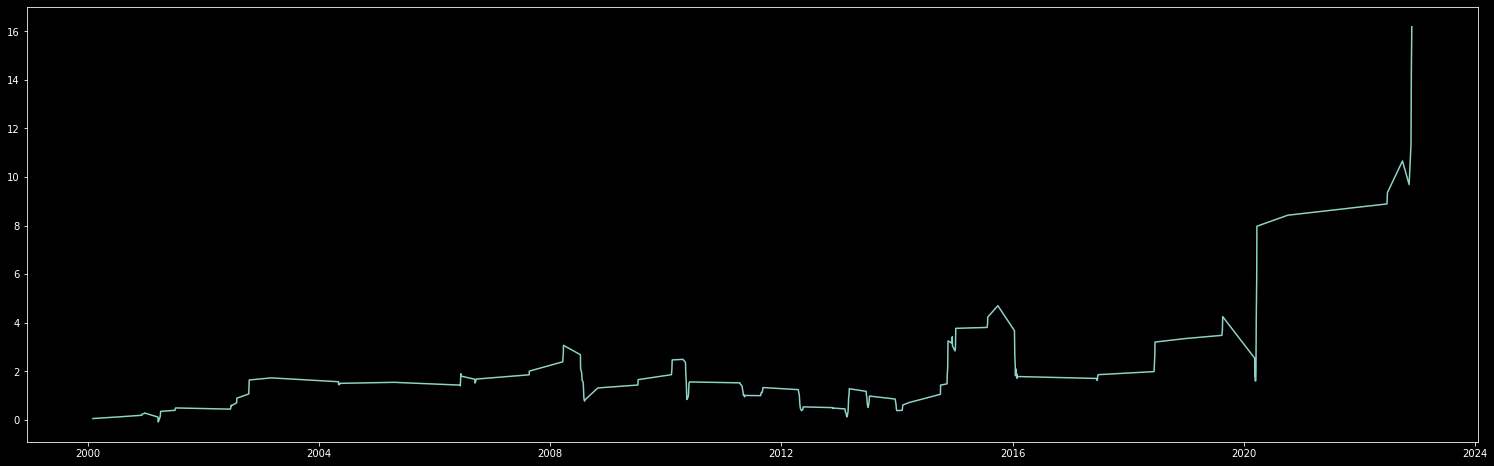

In [22]:
plt.figure(figsize=(26,8))
plt.plot(datas_compras, performance_acumulada)
#plt.plot(dados_ativo['Adj Close'], alpha = .6)
plt.show()

In [23]:
# Comparar com buy_hold
retorno_buy_hold = dados_ativo['Adj Close'].iloc[-1] / dados_ativo['Adj Close'].iloc[0] - 1
retorno_buy_hold * 100


1562.593469725654

## Fazendo outros ajustes

In [24]:
datas_compras2 = []
datas_vendas2 = []

for i in range(len(dados_ativo)):
    #print(i)
    
    
    if 'sim' in dados_ativo['compra'].iloc[i]:
        
        datas_compras2.append(dados_ativo.iloc[i + 1].name) # comprar no preço de abertura do dia seguinte
        for j in range(1, 11):
            if dados_ativo['RSI'].iloc[ i + j] > 70:
                datas_vendas2.append(dados_ativo.iloc[ i + j + 1].name)
                break
            elif j == 10:
                datas_vendas2.append(dados_ativo.iloc[ i + j + 1].name)
                
            
        
datas_compras2

[Timestamp('2000-02-02 00:00:00'),
 Timestamp('2000-08-04 00:00:00'),
 Timestamp('2000-12-07 00:00:00'),
 Timestamp('2000-12-08 00:00:00'),
 Timestamp('2000-12-22 00:00:00'),
 Timestamp('2000-12-25 00:00:00'),
 Timestamp('2001-03-19 00:00:00'),
 Timestamp('2001-03-20 00:00:00'),
 Timestamp('2001-03-21 00:00:00'),
 Timestamp('2001-03-23 00:00:00'),
 Timestamp('2001-03-27 00:00:00'),
 Timestamp('2001-04-03 00:00:00'),
 Timestamp('2001-04-04 00:00:00'),
 Timestamp('2001-04-05 00:00:00'),
 Timestamp('2001-07-05 00:00:00'),
 Timestamp('2001-07-06 00:00:00'),
 Timestamp('2001-07-09 00:00:00'),
 Timestamp('2002-06-20 00:00:00'),
 Timestamp('2002-06-21 00:00:00'),
 Timestamp('2002-06-24 00:00:00'),
 Timestamp('2002-06-25 00:00:00'),
 Timestamp('2002-06-26 00:00:00'),
 Timestamp('2002-07-29 00:00:00'),
 Timestamp('2002-07-30 00:00:00'),
 Timestamp('2002-07-31 00:00:00'),
 Timestamp('2002-10-14 00:00:00'),
 Timestamp('2002-10-15 00:00:00'),
 Timestamp('2002-10-16 00:00:00'),
 Timestamp('2002-10-

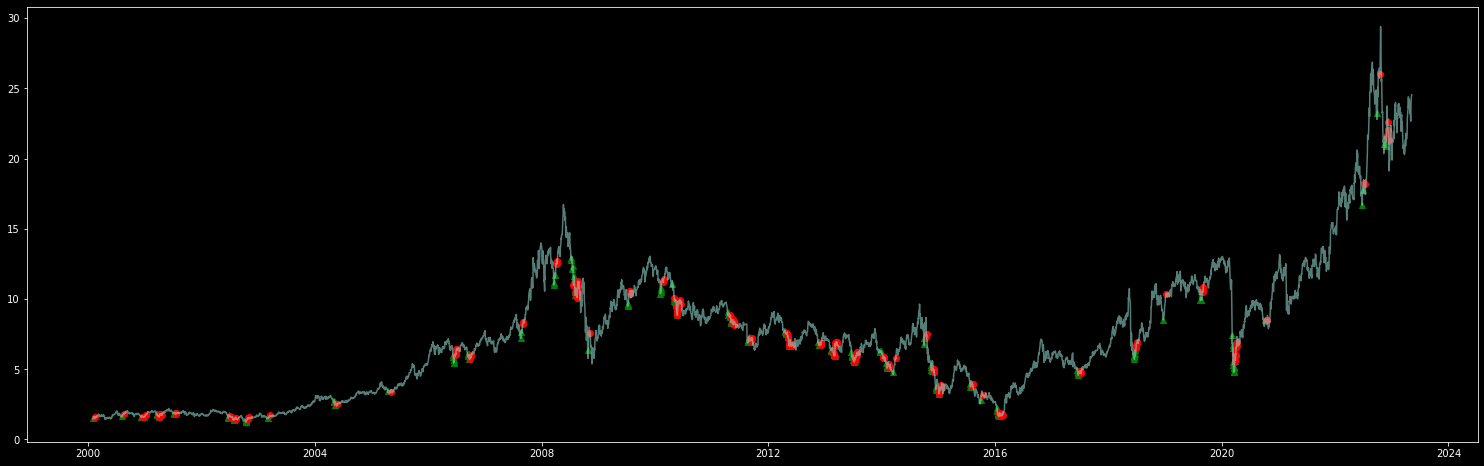

In [25]:
plt.figure(figsize=(26,8))
plt.scatter(dados_ativo.loc[datas_compras2].index, dados_ativo.loc[datas_compras2]['Adj Close'], marker = '^', c = 'green')
plt.scatter(dados_ativo.loc[datas_vendas2].index, dados_ativo.loc[datas_vendas2]['Adj Close'], marker='o', c='red')
plt.plot(dados_ativo['Adj Close'], alpha = .6)

In [26]:
# calculando os lucros

lucros2 = dados_ativo.loc[datas_vendas2]['Open'].values / dados_ativo.loc[datas_compras2]['Open'].values - 1

lucros2

array([ 8.26414546e-02,  1.18064552e-01,  2.19951503e-02, -2.18818377e-02,
        1.18568214e-01,  1.11111111e-01, -1.30560927e-01, -1.23781649e-01,
       -6.84104924e-02,  4.76386364e-02,  5.88598601e-02,  9.78864880e-02,
        1.18790499e-01,  2.04081633e-02, -3.83143218e-03, -1.53846007e-02,
        2.10727674e-02, -3.30595603e-02,  1.08225106e-02,  7.12962491e-02,
        2.52796655e-02, -1.04925411e-02,  1.32027434e-01,  6.40506020e-02,
        2.00048784e-02,  1.97771537e-01,  1.71507516e-01,  1.99147675e-01,
        1.74723236e-01,  1.28802232e-01, -5.80002382e-02, -4.60526316e-02,
        1.44769674e-04,  2.11368670e-02,  0.00000000e+00, -2.35551533e-02,
        3.36598871e-02,  9.44000244e-02,  1.07191341e-01,  1.40547974e-01,
        9.18959690e-02,  6.17283951e-02, -4.51128567e-02, -5.85210426e-02,
        3.40478795e-02,  2.26131041e-02,  1.23789018e-01,  1.24228895e-01,
        1.48638793e-01,  1.38483549e-01,  8.97901842e-02, -9.50113054e-02,
       -1.54171910e-01, -

In [27]:
# Qual a média de lucros

operacoes_vencedoras2 = len(lucros2[lucros2 > 0]) / len(lucros2)
media_ganhos2 = np.mean(lucros2[lucros2 > 0])
print(f"Operações ganhadoras {operacoes_vencedoras2} Média de ganhos {media_ganhos2}")

Operações ganhadoras 0.5236051502145923 Média de ganhos 0.08427265194887029


In [28]:
# Qual a média de perdas

operacoes_perdedoras2 = len(lucros2[lucros2 < 0]) / len(lucros2)
media_perdas2 = abs(np.mean(lucros2[lucros2 < 0]))
print(f"Operações perdedoras {operacoes_perdedoras2} Média de perdas {media_perdas2}")

Operações perdedoras 0.4678111587982833 Média de perdas 0.055675096501625033


In [29]:
# Expectativa do modelo

expectativa_mat_mod2 = (operacoes_vencedoras2 * media_ganhos2) - ((1 - operacoes_vencedoras2) * media_perdas2)

print(f"Expectativa do modelo: {expectativa_mat_mod2 * 100}")

Expectativa do modelo: 1.7602265347990549


In [30]:
# performance acumulada
performance_acumulada2 = (np.cumprod((1 + lucros2)) - 1) 
print(f"Performance acumulada do modelo: {performance_acumulada2 * 100}")

Performance acumulada do modelo: [   8.26414546   21.04630332   23.70873496   21.00176049   35.34872307
   50.38747008   30.75274265   14.56795262    6.73030257   11.81478864
   18.39619146   29.98557883   45.42663057   48.39452099   47.82595744
   45.55171411   48.61889153   43.70561633   45.26087189   55.6174272
   59.55138371   57.87728425   78.72141704   90.16863139   93.97293173
  132.33525655  172.18249917  226.38701113  283.41440594  332.79903731
  307.69659005  288.9210892   288.97739317  297.1991566   297.1991566
  287.84306957  300.89782352  338.74258784  385.77199431  454.04626417
  504.96088251  542.30414686  513.32797191  477.43537953  497.09582975
  510.5980199   586.18334944  671.42714881  786.09114944  908.80019679
  999.38055226  894.92697083  741.53717894  691.91768407  605.97311529
  599.52877053  572.27958889  534.80326965  484.16370418  451.88946706
  409.28208237  384.18701197  378.80717169  384.19519287  391.46023328
  487.23195182  539.08822967  600.34056528  67

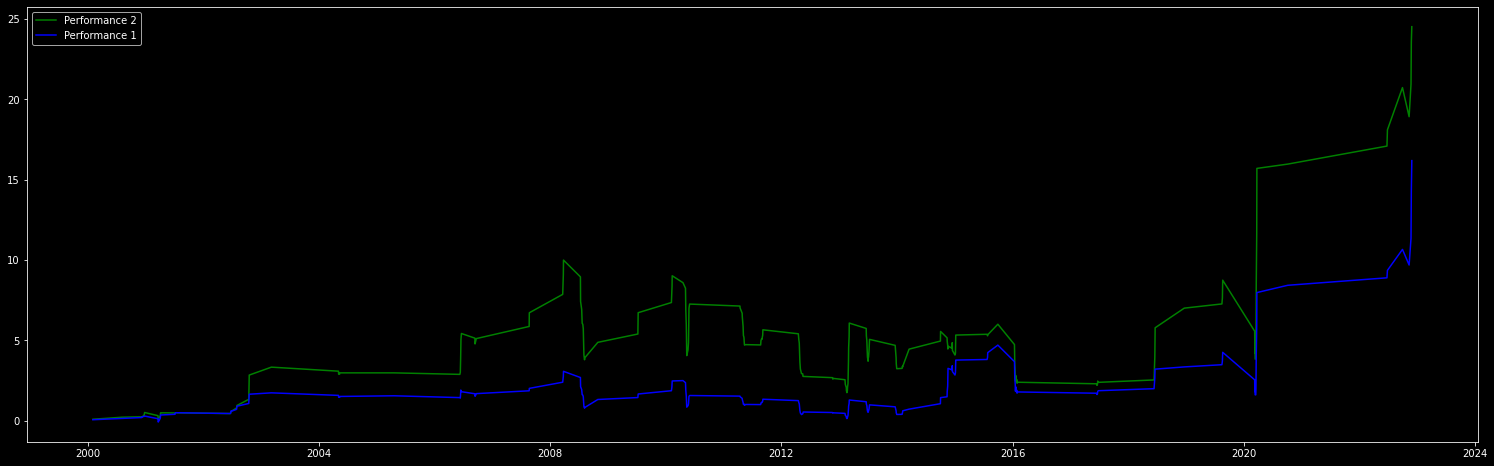

In [31]:
plt.figure(figsize=(26,8))
plt.plot(datas_compras2, performance_acumulada2, c='green', label = 'Performance 2')
plt.plot(datas_compras, performance_acumulada, c = 'blue', label = 'Performance 1')
plt.legend()
#plt.plot(dados_ativo['Adj Close'], alpha = .6)
plt.show()